In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from glob import glob

In [3]:
target = ['YL_M1_B1_W1','YR_M1_B1_W1','YL_M1_B1_W2','YR_M1_B1_W2']

In [4]:
data_path = glob('./data/*.csv')
data_path = [ './data\\data_c100.csv',
 './data\\data_c30.csv',
 './data\\data_c40.csv',
 './data\\data_c50.csv',
 './data\\data_c70.csv',
            './data\\data_s100.csv',
 './data\\data_s30.csv',
 './data\\data_s40.csv',
 './data\\data_s50.csv',
 './data\\data_s70.csv']

data_path

['./data\\data_c100.csv',
 './data\\data_c30.csv',
 './data\\data_c40.csv',
 './data\\data_c50.csv',
 './data\\data_c70.csv',
 './data\\data_s100.csv',
 './data\\data_s30.csv',
 './data\\data_s40.csv',
 './data\\data_s50.csv',
 './data\\data_s70.csv']

In [4]:
pd.read_csv('./data/answer_sample.csv')

,Distance,YL_M1_B1_W1_s30,YR_M1_B1_W1_s30,YL_M1_B1_W2_s30,YR_M1_B1_W2_s30,YL_M1_B1_W1_s40,YR_M1_B1_W1_s40,YL_M1_B1_W2_s40,YR_M1_B1_W2_s40,YL_M1_B1_W1_s50,...,YL_M1_B1_W2_c50,YR_M1_B1_W2_c50,YL_M1_B1_W1_c70,YR_M1_B1_W1_c70,YL_M1_B1_W2_c70,YR_M1_B1_W2_c70,YL_M1_B1_W1_c100,YR_M1_B1_W1_c100,YL_M1_B1_W2_c100,YR_M1_B1_W2_c100
0,2500.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2500.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2500.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2501.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2501.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,2998.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,2999.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,2999.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,2999.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
pd.read_csv('./data\\lane_data_c.csv')

,Distance,Curvature,Vertical offset,Cross level offset
0,0.00,0.0,0.0,0.0
1,0.25,0.0,0.0,0.0
2,0.50,0.0,0.0,0.0
3,0.75,0.0,0.0,0.0
4,1.00,0.0,0.0,0.0
...,...,...,...,...
11995,2998.75,0.0,0.0,0.0
11996,2999.00,0.0,0.0,0.0
11997,2999.25,0.0,0.0,0.0
11998,2999.50,0.0,0.0,0.0


In [6]:
data_path = [
 './data\\data_c30.csv',
 './data\\data_c40.csv',
 './data\\data_c50.csv',
 './data\\data_c70.csv',
 './data\\data_c100.csv']
data_c = [pd.merge(pd.read_csv('./data\\lane_data_c.csv',),pd.read_csv(i)) for i in data_path]
data_c = [pd.read_csv(i) for i in data_path]

# tar = data_c[0]
# for i in tar.columns:
#     plt.title(i)
#     tar[i].plot()
#     plt.show()

data_path = [
 './data\\data_s30.csv',
 './data\\data_s40.csv',
 './data\\data_s50.csv',
 './data\\data_s70.csv',
 './data\\data_s100.csv']
data_s = [pd.merge(pd.read_csv('./data\\lane_data_s.csv',),pd.read_csv(i)) for i in data_path]
data_s = [pd.read_csv(i) for i in data_path]

In [7]:
tp = [('YR_M1_B1_W1', 'YL_M1_B1_W2', 'YR_M1_B1_W2'),
      ('YL_M1_B1_W1', 'YL_M1_B1_W2', 'YR_M1_B1_W2'),
      ('YL_M1_B1_W1', 'YR_M1_B1_W1', 'YR_M1_B1_W2'),
      ('YL_M1_B1_W1', 'YR_M1_B1_W1', 'YL_M1_B1_W2')]

In [22]:
data_s[0]

,Distance,Cross level,Curvature,Lateral,Vertical,Gauge,A_M1_C_B1_Y,A_M1_C_B1_Z,A_M1_B1_W1_Y_L,A_M1_B1_BC_Y_L,...,QL_M1_B1_W1,QR_M1_B1_W1,V_M1_B1_W2_L,V_M1_B1_W2_R,QL_M1_B1_W2,QR_M1_B1_W2,YL_M1_B1_W1,YR_M1_B1_W1,YL_M1_B1_W2,YR_M1_B1_W2
0,0.00,0.081,0.002,1.308,1.155,0.345,-1.273400e-09,-1.943500e-08,0.022194,0.022194,...,-0.305900,0.354800,0.000832,0.000847,0.000012,0.000012,0.001366,0.001558,0.001412,0.001406
1,0.25,0.251,0.002,1.282,1.157,0.151,1.485600e-05,3.403000e-06,0.161500,0.159800,...,-0.086214,0.088455,-0.010882,0.012985,-0.000163,0.000191,0.007337,-0.004638,0.001448,0.001525
2,0.50,0.421,0.002,1.256,1.159,-0.043,2.706500e-04,5.112900e-05,0.579500,0.569500,...,-0.085584,0.082844,-0.008447,0.010115,-0.000127,0.000149,0.011998,-0.009334,0.001715,0.001607
3,0.75,0.416,0.002,1.297,0.858,0.033,1.247900e-03,1.295900e-04,0.812000,0.789500,...,-0.249400,-0.187700,0.153500,-0.153900,0.002307,-0.002261,0.008566,-0.005116,0.002410,0.001200
4,1.00,0.412,0.002,1.337,0.558,0.110,3.080900e-03,-1.466900e-03,0.383100,0.349700,...,-0.289500,-0.268300,0.630800,-0.630400,0.009477,-0.009258,0.002605,0.001091,0.003430,0.000351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,2998.75,-0.639,-0.002,0.295,-0.503,-0.477,9.026600e-02,8.505400e-02,-1.096000,-1.012000,...,0.213100,0.103000,-9.184000,-17.920000,-0.138000,-0.263100,0.000000,0.000000,0.000000,0.000000
11996,2999.00,-0.827,-0.002,0.299,-0.785,-0.218,1.043000e-01,9.336100e-02,-0.938800,0.048887,...,0.154200,0.051614,-8.026000,-22.840000,-0.120600,-0.335400,0.000000,0.000000,0.000000,0.000000
11997,2999.25,-0.861,-0.001,0.116,-0.931,-0.048,1.151000e-01,7.851500e-02,-0.405400,1.249000,...,0.098817,0.148900,-10.770000,-30.400000,-0.161800,-0.446400,0.000000,0.000000,0.000000,0.000000
11998,2999.50,-0.894,0.000,-0.068,-1.077,0.122,1.239000e-01,4.084100e-02,-0.312900,1.486000,...,0.001088,0.152100,-16.290000,-34.690000,-0.244800,-0.509500,0.000000,0.000000,0.000000,0.000000


In [16]:
data_c[0]

,Distance,Curvature,Vertical offset,Cross level offset,A_M1_C_B1_Y,A_M1_C_B1_Z,A_M1_B1_W1_Y_L,A_M1_B1_BC_Y_L,A_M1_B1_W2_Y_L,A_M1_B1_W1_Y_R,...,QL_M1_B1_W1,QR_M1_B1_W1,V_M1_B1_W2_L,V_M1_B1_W2_R,QL_M1_B1_W2,QR_M1_B1_W2,YL_M1_B1_W1,YR_M1_B1_W1,YL_M1_B1_W2,YR_M1_B1_W2
0,0.00,0.0,0.0,0.0,-1.273400e-09,-1.943500e-08,0.022194,0.022194,0.022194,0.022194,...,-0.305900,0.354800,0.000832,0.000847,0.000012,0.000012,0.001366,0.001558,0.001412,0.001406
1,0.25,0.0,0.0,0.0,1.485600e-05,3.403000e-06,0.161500,0.159800,0.158200,0.161500,...,-0.086214,0.088455,-0.010882,0.012985,-0.000163,0.000191,0.007337,-0.004638,0.001448,0.001525
2,0.50,0.0,0.0,0.0,2.706500e-04,5.112900e-05,0.579500,0.569500,0.559500,0.579500,...,-0.085584,0.082844,-0.008447,0.010115,-0.000127,0.000149,0.011998,-0.009334,0.001715,0.001607
3,0.75,0.0,0.0,0.0,1.247900e-03,1.295900e-04,0.812000,0.789500,0.767100,0.811800,...,-0.249400,-0.187700,0.153500,-0.153900,0.002307,-0.002261,0.008566,-0.005116,0.002410,0.001200
4,1.00,0.0,0.0,0.0,3.080900e-03,-1.466900e-03,0.383100,0.349700,0.316300,0.382700,...,-0.289500,-0.268300,0.630800,-0.630400,0.009477,-0.009258,0.002605,0.001091,0.003430,0.000351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,2998.75,0.0,0.0,0.0,8.982300e-02,8.510300e-02,-1.100000,-1.016000,-0.931900,-1.102000,...,0.213300,0.102600,-9.153000,-17.960000,-0.137500,-0.263800,0.000000,0.000000,0.000000,0.000000
11996,2999.00,0.0,0.0,0.0,1.039000e-01,9.337700e-02,-0.937900,0.046609,1.031000,-0.938500,...,0.154400,0.051214,-7.990000,-22.870000,-0.120000,-0.335900,0.000000,0.000000,0.000000,0.000000
11997,2999.25,0.0,0.0,0.0,1.147000e-01,7.847700e-02,-0.403500,1.246000,2.896000,-0.403100,...,0.099015,0.148700,-10.750000,-30.460000,-0.161600,-0.447300,0.000000,0.000000,0.000000,0.000000
11998,2999.50,0.0,0.0,0.0,1.234000e-01,4.075700e-02,-0.313900,1.483000,3.280000,-0.312900,...,0.001208,0.151700,-16.270000,-34.710000,-0.244400,-0.509800,0.000000,0.000000,0.000000,0.000000


In [24]:
pd.read_csv('./data/data_columns.csv')

,name,description
0,Distance,거리[m]
1,A_M1_C_B1_Y,대차상부 차체 횡가속도[m/s^2]
2,A_M1_C_B1_Z,대차상부 차체 수직가속도[m/s^2]
3,A_M1_B1_W1_Y_L,좌측 전위 대차 프레임 횡가속도[m/s^2]
4,A_M1_B1_BC_Y_L,좌측 중앙 대차 프레임 횡가속도[m/s^2]
5,A_M1_B1_W2_Y_L,좌측 후위 대차 프레임 횡가속도[m/s^2]
6,A_M1_B1_W1_Y_R,우측 전위 대차 프레임 횡가속도[m/s^2]
7,A_M1_B1_BC_Y_R,우측 중앙 대차 프레임 횡가속도[m/s^2]
8,A_M1_B1_W2_Y_R,우측 후위 대차 프레임 횡가속도[m/s^2]
9,A_M1_B1_W1_Z_L,좌측 전위 대차 프레임 수직가속도[m/s^2]


In [26]:
target_ = ['YL_M1_B1_W1', 'YR_M1_B1_W1', 'YL_M1_B1_W2', 'YR_M1_B1_W2']
droping = [('YR_M1_B1_W1', 'YL_M1_B1_W2', 'YR_M1_B1_W2'), # x
      ('YL_M1_B1_W1', 'YL_M1_B1_W2', 'YR_M1_B1_W2'),
      ('YL_M1_B1_W1', 'YR_M1_B1_W1', 'YR_M1_B1_W2'),
      ('YL_M1_B1_W1', 'YR_M1_B1_W1', 'YL_M1_B1_W2')]
droping = [list(i) for i in droping]
best_ = []

In [51]:
from sklearn.decomposition import KernelPCA
kernel_pca = KernelPCA(
    n_components=2, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)
data = kernel_pca.fit_transform(data_c[0].drop(droping[0],axis=1))

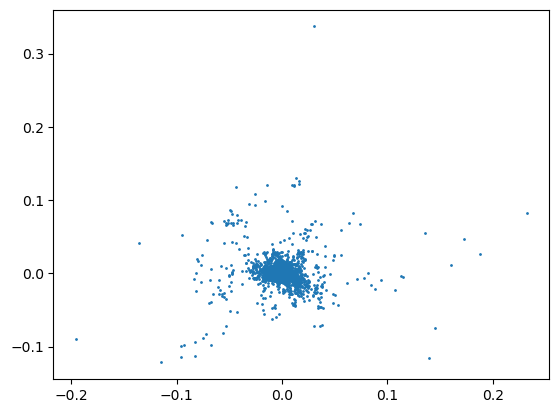

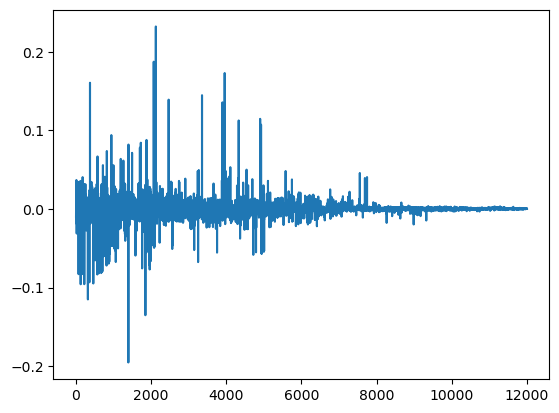

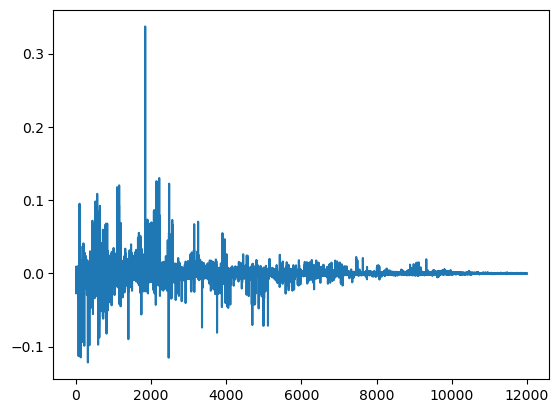

In [56]:
data = pd.DataFrame(data,columns=['x','y'])
plt.scatter(data=data,x='x',y='y',s=1)
plt.show()
plt.plot(data.x)
plt.show()
plt.plot(data.y)
plt.show()

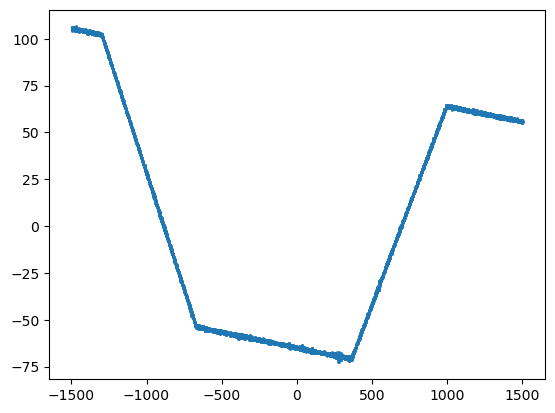

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pd.DataFrame(pca.fit_transform(data_c[3].drop(droping[0],axis=1)),columns=['x','y'])
plt.scatter(data=data,x='x',y='y',s=1)

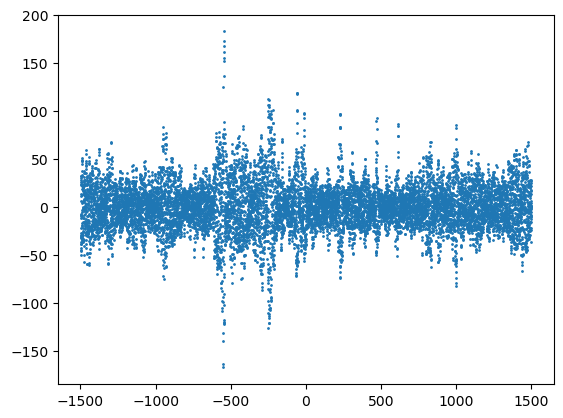

In [46]:
from sklearn.decomposition import PCA
idx = 2
pca = PCA(n_components=2)
data = pd.DataFrame(pca.fit_transform(data_s[0].drop(droping[idx],axis=1)),columns=['x','y'])
plt.scatter(data=data,x='x',y='y',s=1)

In [135]:
data_path = [
 './data\\data_s30.csv',
 './data\\data_s40.csv',
 './data\\data_s50.csv',
 './data\\data_s70.csv',
 './data\\data_s100.csv']
data = pd.DataFrame()
for i in range(len(data_s)):
    data = pd.concat([data,pd.read_csv(data_path[i]).iloc[:,1:31]],axis=1)
data.columns = [f's_{i}' for i in range(150)]
data

,s_0,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,...,s_140,s_141,s_142,s_143,s_144,s_145,s_146,s_147,s_148,s_149
0,-1.273400e-09,-1.943500e-08,0.022194,0.022194,0.022194,0.022194,0.022194,0.022194,-0.055737,-0.055737,...,33.410,-0.085212,-20.360000,24.150,-0.305900,0.354800,0.000832,0.000847,0.000012,0.000012
1,1.485600e-05,3.403000e-06,0.161500,0.159800,0.158200,0.161500,0.159800,0.158200,-0.369500,-0.384500,...,6.927,-0.040134,-5.737000,6.022,-0.086214,0.088455,-0.010882,0.012985,-0.000163,0.000191
2,2.706500e-04,5.112900e-05,0.579500,0.569500,0.559500,0.579500,0.569500,0.559500,-1.329000,-1.366000,...,2.705,0.216600,-5.695000,5.640,-0.085584,0.082844,-0.008447,0.010115,-0.000127,0.000149
3,1.247900e-03,1.295900e-04,0.812000,0.789500,0.767100,0.811800,0.789300,0.766900,-2.511000,-2.166000,...,-19.860,0.700500,-16.600000,-12.780,-0.249400,-0.187700,0.153500,-0.153900,0.002307,-0.002261
4,3.080900e-03,-1.466900e-03,0.383100,0.349700,0.316300,0.382700,0.349300,0.315900,-5.545000,-2.892000,...,-19.170,0.882800,-19.260000,-18.270,-0.289500,-0.268300,0.630800,-0.630400,0.009477,-0.009258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,9.026600e-02,8.505400e-02,-1.096000,-1.012000,-0.927300,-1.098000,-1.014000,-0.929000,10.430000,5.617000,...,4.999,-6.857000,14.140000,7.241,0.212500,0.106400,-8.669000,-18.450000,-0.130200,-0.270900
11996,1.043000e-01,9.336100e-02,-0.938800,0.048887,1.037000,-0.939500,0.048170,1.036000,5.924000,-0.865000,...,1.163,-13.000000,10.200000,3.658,0.153200,0.053737,-7.556000,-23.300000,-0.113500,-0.342100
11997,1.151000e-01,7.851500e-02,-0.405400,1.249000,2.902000,-0.404900,1.249000,2.903000,0.466600,-5.933000,...,10.260,-26.710000,6.583000,10.190,0.098914,0.149600,-10.400000,-30.810000,-0.156300,-0.452500
11998,1.239000e-01,4.084100e-02,-0.312900,1.486000,3.285000,-0.311900,1.487000,3.286000,-0.784600,-5.954000,...,10.200,-32.210000,0.097591,10.300,0.001466,0.151300,-16.030000,-34.930000,-0.240800,-0.513000


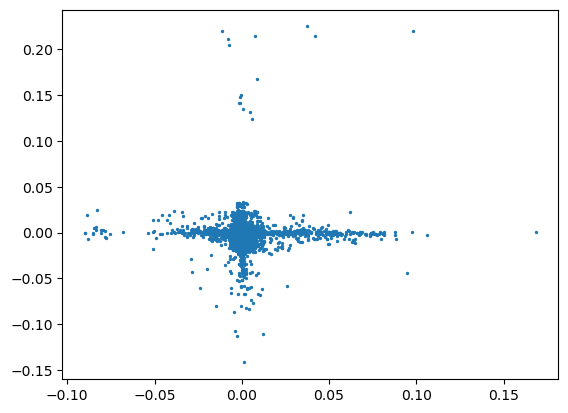

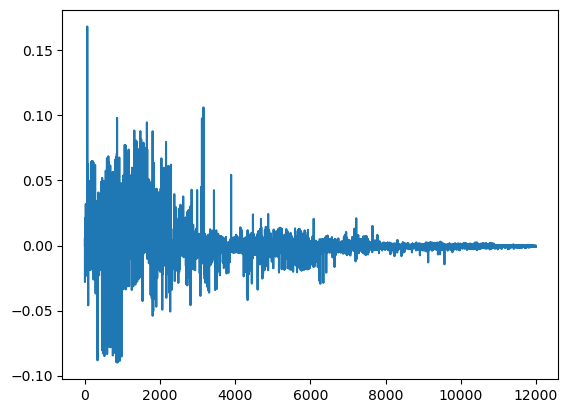

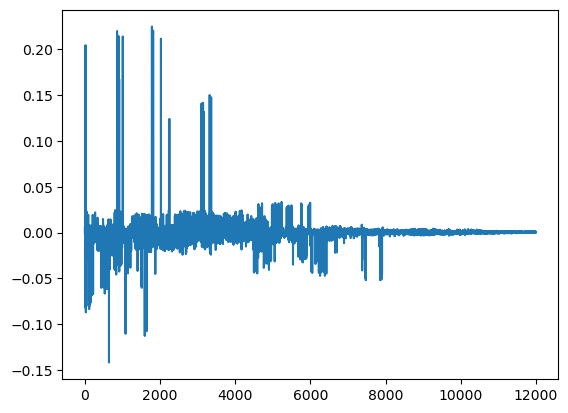

In [155]:
from sklearn.decomposition import KernelPCA

data_path = [
 './data\\data_s30.csv',
 './data\\data_s40.csv',
 './data\\data_s50.csv',
 './data\\data_s70.csv',
 './data\\data_s100.csv']
data = pd.DataFrame()
for i in range(len(data_s)):
    data = pd.concat([data,pd.read_csv(data_path[i]).iloc[:,1:31]],axis=1)
data.columns = [f's_{i}' for i in range(150)]

kernel_pca = KernelPCA(
    n_components=2, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)
tp = kernel_pca.fit_transform(data)
tp_d = pd.DataFrame(tp,columns=['x','y'])
plt.scatter(data=tp_d,x='x',y='y',s=2)
plt.show()
plt.plot(tp_d.x)
plt.show()
plt.plot(tp_d.y)
plt.show()

In [156]:
idx = tp_d[:10000][(tp_d['x'] < 0.01) & (tp_d['x'] > -0.01) & (tp_d['y'] < 0.025) & (tp_d['y'] > -0.025)].index
idx2 = tp_d[10001:][(tp_d['x'] < 0.01) & (tp_d['x'] > -0.01) & (tp_d['y'] < 0.025) & (tp_d['y'] > -0.025)].index

In [157]:
data.loc[idx,:]

,s_0,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,...,s_140,s_141,s_142,s_143,s_144,s_145,s_146,s_147,s_148,s_149
0,-1.273400e-09,-1.943500e-08,0.022194,0.022194,0.022194,0.022194,0.022194,0.022194,-0.055737,-0.055737,...,33.4100,-0.085212,-20.360,24.1500,-0.305900,0.354800,0.000832,0.000847,0.000012,0.000012
1,1.485600e-05,3.403000e-06,0.161500,0.159800,0.158200,0.161500,0.159800,0.158200,-0.369500,-0.384500,...,6.9270,-0.040134,-5.737,6.0220,-0.086214,0.088455,-0.010882,0.012985,-0.000163,0.000191
4,3.080900e-03,-1.466900e-03,0.383100,0.349700,0.316300,0.382700,0.349300,0.315900,-5.545000,-2.892000,...,-19.1700,0.882800,-19.260,-18.2700,-0.289500,-0.268300,0.630800,-0.630400,0.009477,-0.009258
6,6.445500e-03,-3.181100e-02,-1.003000,-1.062000,-1.120000,-1.002000,-1.061000,-1.120000,-5.016000,-0.496100,...,9.5190,-1.764000,10.630,-3.5510,0.159800,-0.052155,1.860000,-1.616000,0.027949,-0.023736
7,6.526900e-03,-5.709800e-02,-1.066000,-1.145000,-1.225000,-1.065000,-1.145000,-1.224000,3.400000,3.665000,...,-5.6360,-2.883000,4.842,-12.3500,0.072767,-0.181500,1.626000,-0.996800,0.024426,-0.014639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2.545000e-01,3.095700e-03,1.268000,0.508300,-0.251000,1.271000,0.512000,-0.247400,-0.157600,1.855000,...,2.3770,-3.052000,-6.174,-0.8154,-0.092769,-0.011977,8.272000,-5.840000,0.124300,-0.085765
9996,-2.329000e-01,4.060000e-02,1.397000,0.724700,0.052776,1.398000,0.726500,0.054553,-3.335000,-1.342000,...,-0.1539,-4.414000,-13.160,-3.7940,-0.197700,-0.055730,0.067466,-10.450000,0.001014,-0.153500
9997,-2.130000e-01,5.933500e-02,1.982000,1.429000,0.876100,1.979000,1.426000,0.873600,-6.493000,-5.211000,...,-15.2400,-6.175000,-16.790,-14.6100,-0.252300,-0.214600,-5.532000,-12.970000,-0.083112,-0.190500
9998,-1.937000e-01,5.281600e-02,2.326000,1.741000,1.156000,2.322000,1.737000,1.152000,-7.951000,-7.136000,...,-15.9400,-7.004000,-16.820,-16.3400,-0.252800,-0.240100,-9.294000,-12.790000,-0.139600,-0.187900


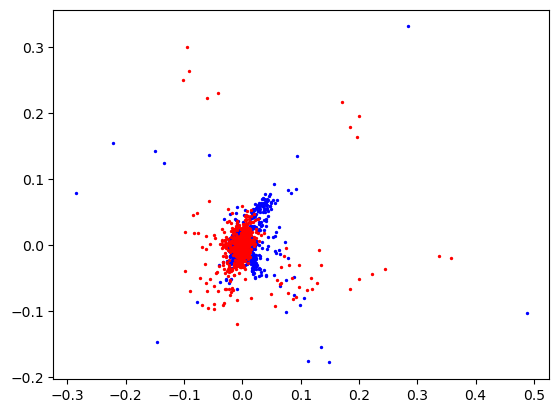

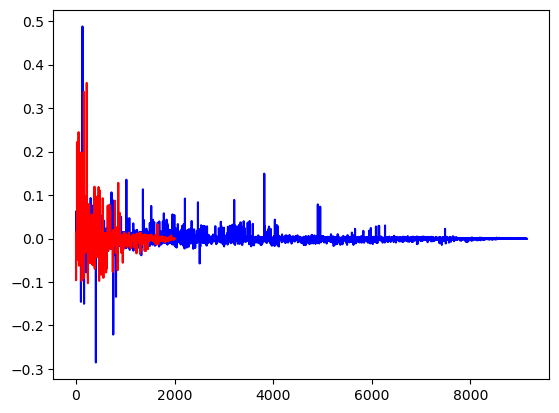

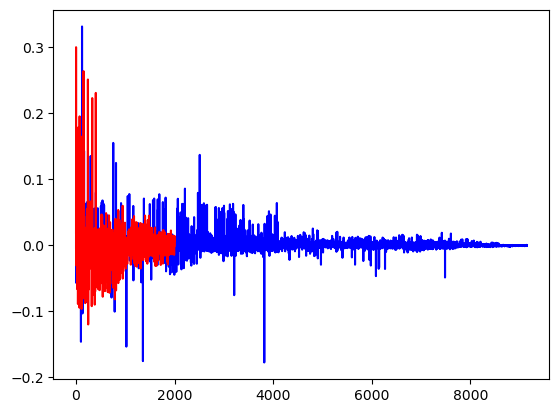

In [158]:
kernel_pca = KernelPCA(
    n_components=2, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)
tp = kernel_pca.fit_transform(data.loc[idx,:])
tp2 = kernel_pca.fit_transform(data.loc[idx2,:])
tp_d = pd.DataFrame(tp,columns=['x','y'])
tp_d2 = pd.DataFrame(tp2,columns=['x','y'])

plt.scatter(data=tp_d,x='x',y='y',s=2,color='blue')
plt.scatter(data=tp_d2,x='x',y='y',s=2,color='red')
plt.show()
plt.plot(tp_d.x,color='blue')
plt.plot(tp_d2.x,color='red')
plt.show()
plt.plot(tp_d.y,color='blue')
plt.plot(tp_d2.y,color='red')
plt.show()




In [164]:
ans = pd.read_csv('./data/answer_sample.csv')
target_ = ['YL_M1_B1_W1', 'YR_M1_B1_W1', 'YL_M1_B1_W2', 'YR_M1_B1_W2']
for i in range(4):
    cat = CatBoostRegressor(n_estimators=10000,depth=8,random_seed=44,verbose=2000,loss_function='MAPE')
    cat.fit(data.loc[idx,:],data_s[2].loc[idx,target_[i]])
    ans[f'{target_[i]}_s50'] = cat.predict(data.loc[10001:,:])

ans = ans.set_index('Distance')
ans.to_csv('./ans.csv')

0:	learn: 0.0126302	total: 57.6ms	remaining: 9m 36s
2000:	learn: 0.0025147	total: 1m 28s	remaining: 5m 55s
4000:	learn: 0.0019943	total: 2m 57s	remaining: 4m 25s
6000:	learn: 0.0017402	total: 4m 27s	remaining: 2m 58s
8000:	learn: 0.0015776	total: 5m 58s	remaining: 1m 29s
9999:	learn: 0.0014477	total: 7m 31s	remaining: 0us
0:	learn: 0.0125022	total: 68.6ms	remaining: 11m 26s
2000:	learn: 0.0023988	total: 1m 37s	remaining: 6m 30s
4000:	learn: 0.0018905	total: 3m 11s	remaining: 4m 47s
6000:	learn: 0.0016522	total: 4m 43s	remaining: 3m 9s
8000:	learn: 0.0014971	total: 6m 16s	remaining: 1m 33s
9999:	learn: 0.0013798	total: 7m 49s	remaining: 0us
0:	learn: 0.0272625	total: 69.9ms	remaining: 11m 39s
2000:	learn: 0.0021275	total: 1m 32s	remaining: 6m 11s
4000:	learn: 0.0016061	total: 3m 6s	remaining: 4m 40s
6000:	learn: 0.0013709	total: 4m 40s	remaining: 3m 6s
8000:	learn: 0.0012157	total: 6m 17s	remaining: 1m 34s
9999:	learn: 0.0011139	total: 7m 58s	remaining: 0us
0:	learn: 0.0271540	total: 66

In [153]:
# ans = pd.read_csv('./data/answer_sample.csv')
# ans['YL_M1_B1_W1_s100'] = cat.predict(data.loc[10001:,:])
# ans = ans.set_index('Distance')
# ans.to_csv('./ans.csv')

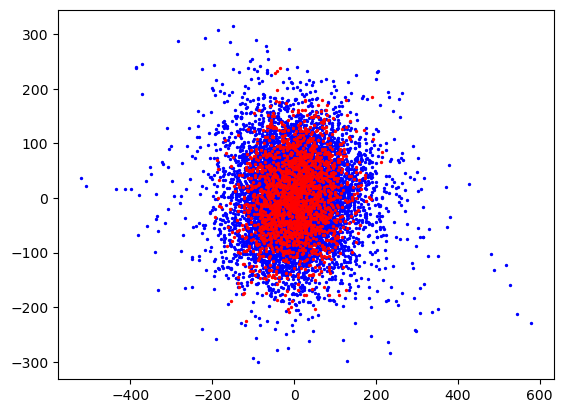

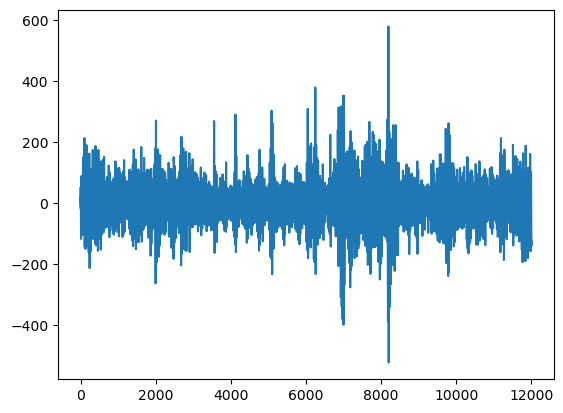

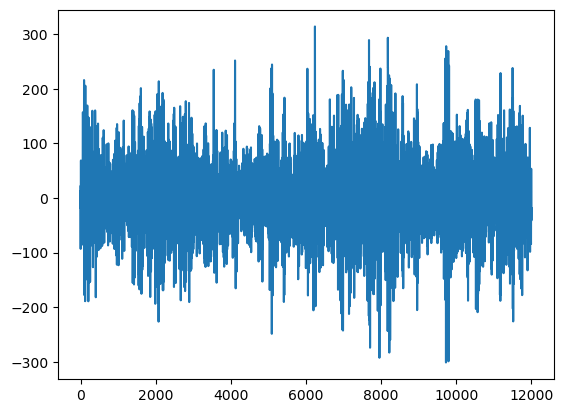

In [41]:
from sklearn.decomposition import KernelPCA, PCA

data_path = [
 './data\\data_c30.csv',
 './data\\data_c40.csv',
 './data\\data_c50.csv',
 './data\\data_c70.csv',
 './data\\data_c100.csv']
data_c = pd.DataFrame()
for i in range(len(data_path)):
    data_c = pd.concat([data_c,pd.read_csv(data_path[i]).iloc[:,1:31]],axis=1)
data_c.columns = [f'c_{i}' for i in range(150)]

data_path = [
 './data\\data_s30.csv',
 './data\\data_s40.csv',
 './data\\data_s50.csv',
 './data\\data_s70.csv',
 './data\\data_s100.csv']
data_s = pd.DataFrame()
for i in range(len(data_path)):
    data_s = pd.concat([data_s,pd.read_csv(data_path[i]).iloc[:,1:31]],axis=1)
data_s.columns = [f's_{i}' for i in range(150)]

data = pd.concat([data_c,data_s],axis=1)
data = pd.concat([data,pd.read_csv('./data/lane_data_c.csv').iloc[:,1:]],axis=1)
data = pd.concat([data,pd.read_csv('./data/lane_data_s.csv').iloc[:,1:]],axis=1)

# kernel_pca = KernelPCA(
#     n_components=2, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1, random_state=42
# )
pca = PCA(n_components=2, random_state=42)
tp = pca.fit_transform(data)
tp_d = pd.DataFrame(tp,columns=['x','y'])
plt.scatter(data=tp_d.loc[:10000,:],x='x',y='y',s=2,c='blue')
plt.scatter(data=tp_d.loc[10000:,:],x='x',y='y',s=2,c='red')
plt.show()
plt.plot(tp_d.x)
plt.show()
plt.plot(tp_d.y)
plt.show()

In [42]:
idx = tp_d[:10000][(tp_d['x'] < 220) & (tp_d['x'] > -220)].index
idx2 = tp_d[10001:][(tp_d['x'] < 220) & (tp_d['x'] > -220)].index

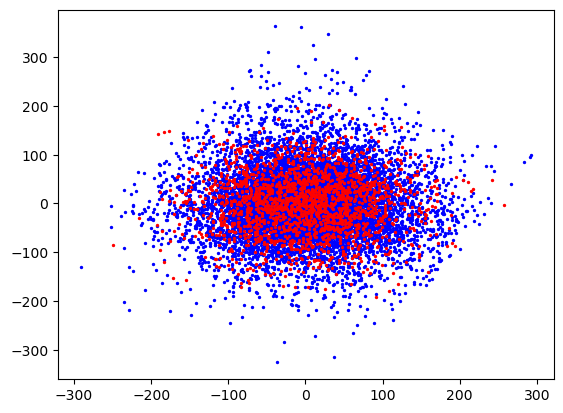

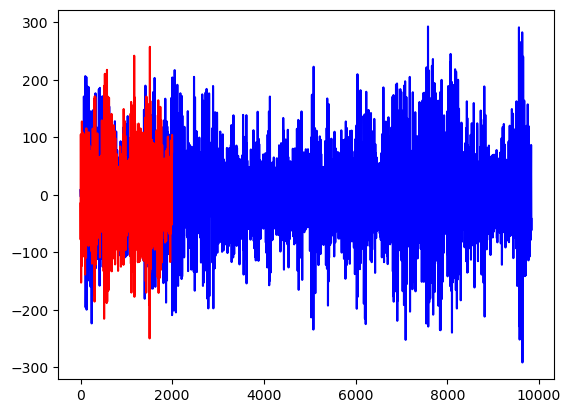

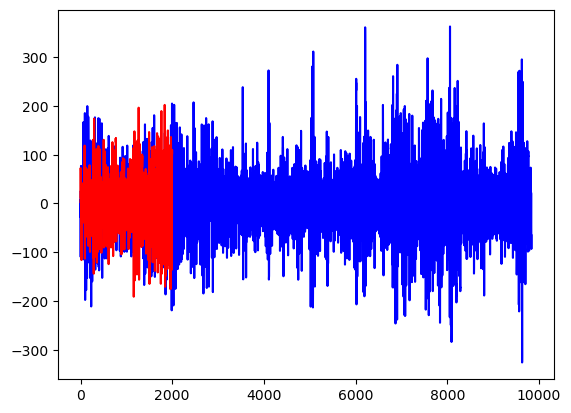

In [43]:
# kernel_pca = KernelPCA(
#     n_components=2, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1, random_state=42
# )
pca = PCA(n_components=2, random_state=42)
tp = pca.fit_transform(data.loc[idx,:])
tp2 = pca.fit_transform(data.loc[idx2,:])
tp_d = pd.DataFrame(tp,columns=['x','y'])
tp_d2 = pd.DataFrame(tp2,columns=['x','y'])

plt.scatter(data=tp_d,x='x',y='y',s=2,color='blue')
plt.scatter(data=tp_d2,x='x',y='y',s=2,color='red')
plt.show()
plt.plot(tp_d.x,color='blue')
plt.plot(tp_d2.x,color='red')
plt.show()
plt.plot(tp_d.y,color='blue')
plt.plot(tp_d2.y,color='red')
plt.show()


In [65]:
droping = ['A_M1_B1_W1_Y_L','A_M1_B1_W2_Y_L','A_M1_B1_W1_Y_R','A_M1_B1_W2_Y_R','A_M1_C_B1_Y',
          'A__B1_W1_Y_A_axle_L','A__B1_W2_Y_A_axle_L','A__B1_W1_Y_A_axle_R','A__B1_W2_Y_A_axle_R']

data_path = [
 './data\\data_c30.csv',
 './data\\data_c40.csv',
 './data\\data_c50.csv',
 './data\\data_c70.csv',
 './data\\data_c100.csv']
data_c = [pd.merge(pd.read_csv('./data\\lane_data_c.csv',),pd.read_csv(i)) for i in data_path]
data_c = [pd.read_csv(i).drop(droping,axis=1) for i in data_path]

# tar = data_c[0]
# for i in tar.columns:
#     plt.title(i)
#     tar[i].plot()
#     plt.show()

data_path = [
 './data\\data_s30.csv',
 './data\\data_s40.csv',
 './data\\data_s50.csv',
 './data\\data_s70.csv',
 './data\\data_s100.csv']
data_s = [pd.merge(pd.read_csv('./data\\lane_data_s.csv',),pd.read_csv(i)) for i in data_path]
data_s = [pd.read_csv(i).drop(droping,axis=1) for i in data_path]

ans = pd.read_csv('./data/answer_sample.csv')
data = pd.DataFrame()
# for i in data_c:
#     data = pd.concat([data,i],axis=1)
for i in data_s:
    data = pd.concat([data,i],axis=1)
    
data = pd.concat([data,pd.read_csv('./data/lane_data_c.csv').iloc[:,1:]],axis=1)
# data = pd.concat([data,pd.read_csv('./data/lane_data_s.csv').iloc[:,1:]],axis=1)
data.columns = [f'mix_{i}' for i in range(len(data.columns))]

target_ = ['YL_M1_B1_W1', 'YR_M1_B1_W1', 'YL_M1_B1_W2', 'YR_M1_B1_W2']
s_list = ['s30','s40','s50','s70','s100']
for j in range(len(s_list)):
    for i in range(4):
        cat = CatBoostRegressor(n_estimators=5000,max_depth=5,random_seed=42,verbose=1000,loss_function='MAE')
        cat.fit(data.loc[idx,:],data_c[j].loc[idx,target_[i]])
        ans[f'{target_[i]}_{s_list[j]}'] = cat.predict(data.loc[10001:,:])
    print('-'*50)

ans = ans.set_index('Distance')
ans.to_csv('./ans.csv')

0:	learn: 0.0166899	total: 9.16ms	remaining: 45.8s
1000:	learn: 0.0071337	total: 7.34s	remaining: 29.3s
2000:	learn: 0.0064103	total: 14.8s	remaining: 22.2s
3000:	learn: 0.0060105	total: 22.3s	remaining: 14.9s
4000:	learn: 0.0057399	total: 29.9s	remaining: 7.46s
4999:	learn: 0.0055448	total: 37.5s	remaining: 0us
0:	learn: 0.0185128	total: 12.1ms	remaining: 1m
1000:	learn: 0.0080115	total: 7.69s	remaining: 30.7s
2000:	learn: 0.0071721	total: 15.4s	remaining: 23.1s
3000:	learn: 0.0066763	total: 23.4s	remaining: 15.6s
4000:	learn: 0.0063500	total: 31.7s	remaining: 7.91s
4999:	learn: 0.0061130	total: 39.9s	remaining: 0us
0:	learn: 0.0400401	total: 8.89ms	remaining: 44.4s
1000:	learn: 0.0155074	total: 8.01s	remaining: 32s
2000:	learn: 0.0139925	total: 16.1s	remaining: 24.1s
3000:	learn: 0.0130230	total: 24.2s	remaining: 16.1s
4000:	learn: 0.0123413	total: 32.3s	remaining: 8.08s
4999:	learn: 0.0118029	total: 40.5s	remaining: 0us
0:	learn: 0.0416041	total: 31.4ms	remaining: 2m 36s
1000:	learn

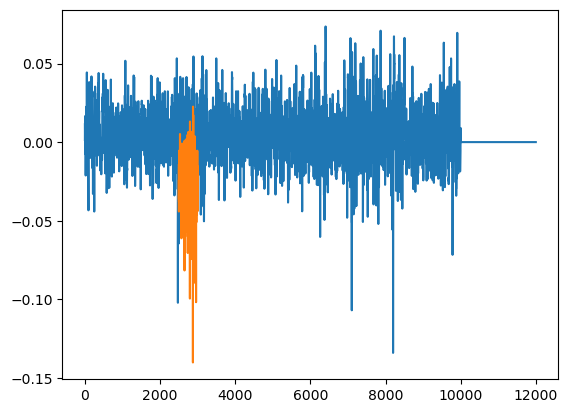

In [75]:
data_s[2]['YL_M1_B1_W1'].plot()
plt.plot(ans['YL_M1_B1_W1_s70']*15)